
# READ ME
## Part 1, inspect data
`This part will:`
1. Get data from movie len 25m
2. Understand data
3. Process data
4. Save necessary data frame


In [86]:
import pandas as pd
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import time

## Checkpoint 1
Get data

In [23]:
credit = pd.read_csv("Dataset/ml-25m/credits.csv")
keyword = pd.read_csv("Dataset/ml-25m/keywords.csv")
link = pd.read_csv("Dataset/ml-25m/links_small.csv")
md = pd.read_csv("Dataset/ml-25m/movies_metadata.csv")
md = md.drop([19730, 29503, 35587]) # drop this due to null value

## Checkpoint2
understand data

In [24]:
credit.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


* **cast**: Information about casting. Name of actor, gender and it's character name in movie
* **crew**: Information about crew members. Like who directed the movie, editor of the movie and so on.
* **id**: It's movie ID given by TMDb

In [25]:
credit.shape

(45476, 3)

In [26]:
type(credit['cast'][0])

str

In [27]:
keyword.head(5)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


* **id**: It's movie ID given by TMDb
* **Keywords**: Tags/keywords for the movie. It list of tags/keywords

In [28]:
keyword.shape

(46419, 2)

In [29]:
link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


* **movieId**: It's serial number for movie
* **imdbId**: Movie id given on IMDb platform
* **tmdbId**: Movie id given on TMDb platform

In [30]:
md

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


* **Features**

* adult: Indicates if the movie is X-Rated or Adult.
* belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
* * budget: The budget of the movie in dollars.
* **genres**: A stringified list of dictionaries that list out all the genres associated with the movie.
* homepage: The Official Homepage of the move.
* **id**: The tmID of the movie.
* **imdb_id**: The IMDB ID of the movie.
* original_language: The language in which the movie was originally shot in.
* original_title: The original title of the movie.
* overview: A brief blurb of the movie.
* popularity: The Popularity Score assigned by TMDB.
* poster_path: The URL of the poster image.
* production_companies: A stringified list of production companies involved with the making of the movie.
* production_countries: A stringified list of countries where the movie was shot/produced in.
* release_date: Theatrical Release Date of the movie.
* revenue: The total revenue of the movie in dollars.
* runtime: The runtime of the movie in minutes.
* spoken_languages: A stringified list of spoken languages in the film.
* status: The status of the movie (Released, To Be Released, Announced, etc.)
* tagline: The tagline of the movie.
title: The Official Title of the movie.
* video: Indicates if there is a video present of the movie with TMDB.
vote_average: The average rating of the movie.
vote_count: The number of votes by users, as counted by TMDB.

## Checkpoint 3
process data (**for content-based purpose only**)
get 5 attributes: 
* **genres**
* **releases**
* **directors**
* **writers**
* **actors**

In [99]:
# this function show frequency of values of sets of elements provided by 'func' parameter
def showFrequency(val, func, left=0, right=0, lim=1000000007):
    f = np.zeros(right-left+1)
    for i in val: 
        res = func(i)-left
        if (res > -1 and res < len(f) and f[res]<lim): f[res] += 1
    plt.bar(np.arange(left, right+1), f)

### Let start moving on links.csv
* I use **tmdbId** because meta-data (md.csv)  has *'id'* columns as tmdbId of a movie. So that I can get any infomation about meta-data *('genres', 'releases',...)*

In [32]:
#remove row that has null value at column 'tmdbId'
tmdbId = link[link['tmdbId'].notnull()]['tmdbId'].astype(int)
print(tmdbId)

0          862
1         8844
2        15602
3        31357
4        11862
         ...  
9120    402672
9121    315011
9122    391698
9123    137608
9124    410803
Name: tmdbId, Length: 9112, dtype: int32


### Get small meta data
I create **smd dataframe**, which is part of **md dataframe**. **smd** receives rows that theirs tmdbId or 'id' match **tmdbId dataframe**

In [33]:
md['id'] = md['id'].astype(int)
smd = md[md['id'].isin(tmdbId)]

In [34]:
smd.shape

(9099, 24)

### Get genres

In [35]:
smd['genres']
# movie has some genres

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
40224    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
40503    [{'id': 99, 'name': 'Documentary'}, {'id': 104...
44821    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
44826    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
45265    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
Name: genres, Length: 9099, dtype: object

* Data in some table stored as json. But it was parse into string
* I will use **literal_eval** from *Abstract* lib

In [36]:
#test
print(literal_eval(smd['genres'][0]))
print()
print(literal_eval(smd['genres'][0])[1]['name'])

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]

Comedy


* I will count frequency of number of values for each movies **by counting its len of list of genres**

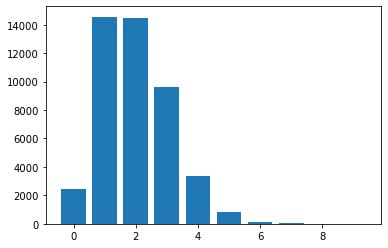

In [37]:
showFrequency(md['genres'].apply(literal_eval), lambda x: len(x), right=9)

In [42]:
# let start moving on get genres
genres = smd['genres'].apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

* I will convert list of string to string

In [43]:
genres = [' '.join(map(str, genre)) for genre in genres]

In [46]:
# review
print(genres[0:7])

['Animation Comedy Family', 'Adventure Fantasy Family', 'Romance Comedy', 'Comedy Drama Romance', 'Comedy', 'Action Crime Drama Thriller', 'Comedy Romance']


* Now, i create count vectorizer, which extract text feature and finally return a **spare-matrix** of feature
* Generating this matrix to calculate **similarity**

In [47]:
count = CountVectorizer(analyzer='word')
genres_matrix = count.fit_transform(genres)
genres_matrix

<9099x22 sparse matrix of type '<class 'numpy.int64'>'
	with 23355 stored elements in Compressed Sparse Row format>

* This matrix is so spare 9099x22/23355

In [48]:
# review
for i in range(5):
    print(genres[i])
    for j in range(22):
        print(genres_matrix[i, j], end=' ')
    print()

Animation Comedy Family
0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
Adventure Fantasy Family
0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 
Romance Comedy
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 
Comedy Drama Romance
0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 
Comedy
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 


### get release year

In [49]:
smd['release_date'][0]

'1995-10-30'

* I will split by '-' and get the first string

In [50]:
releases = [s.split('-')[0] for s in smd['release_date']]
releases[0:10]

['1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995']

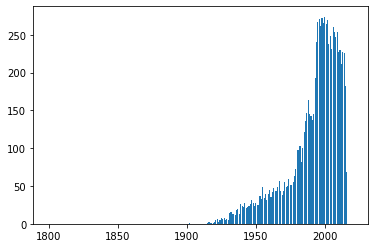

In [51]:
showFrequency(releases, lambda x: int(x), left=1800, right=2020)

* Use feature extration like **genres_matrix**

In [52]:
releases_matrix = count.fit_transform(releases)

In [53]:
# review
print(releases_matrix.shape)
for i in range(5):
    for j in range(103):
        print(releases_matrix[i, j], end=' ')
    print()

(9099, 103)
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Get credit
* Filter credit of movies that appear in **smd data frame**

In [54]:
scredit = credit[credit['id'].isin(smd['id'])]
scredit.shape

(9099, 3)

In [55]:
literal_eval(scredit['cast'][0])[0:3]

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}]

### Count number of director in the crew of every movie

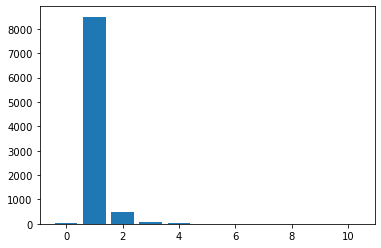

In [56]:
showFrequency([x.count("'Director'") for x in scredit['crew']], lambda x: x, 0, 10)

* **Note**

We should lowercase the name and concatnate all part of the name

Example: Duy Dn -> duydn

In [57]:
directors = scredit['crew'].apply(literal_eval).apply(lambda x: [i['name'] for i in x if i['job'] == 'Director'])
directors = [[str.lower(i.replace(" ", "")) for i in director] for director in directors]
directors = [' '.join(i) for i in directors]

In [58]:
directors_matrix = count.fit_transform(directors)

In [59]:
print(directors[:5])
print(directors_matrix.shape)

['johnlasseter', 'joejohnston', 'howarddeutch', 'forestwhitaker', 'charlesshyer']
(9099, 4185)


### Count writer for each movies

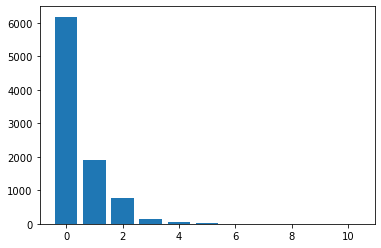

In [60]:
showFrequency([x.count("'Writer'") for x in scredit['crew']], lambda x: x, 0, 10)

In [61]:
writers = scredit['crew'].apply(literal_eval).apply(lambda x: [i['name'] for i in x if i['job'] == 'Writer'])
writers = [[str.lower(i.replace(" ", "")) for i in writer] for writer in writers]
writers = [' '.join(i) for i in writers]

In [62]:
writers_matrix = count.fit_transform(writers)

In [63]:
writers[0:10]

['', '', 'markstevenjohnson', '', '', '', '', '', '', '']

## Count top 10 actor for each movies

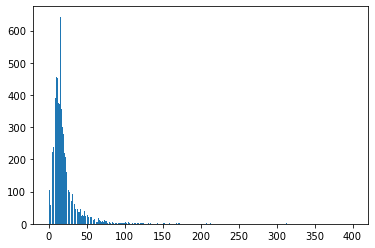

In [64]:
showFrequency(scredit['cast'].apply(literal_eval), lambda x: len(x), 0, 400)

In [65]:
actors = scredit['cast'].apply(literal_eval).apply(lambda x: [str.lower(i['name'].replace(' ', '')) for i in x[0:min(10, len(x))]])

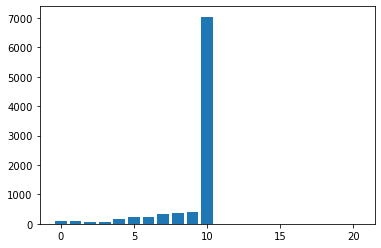

In [66]:
showFrequency(actors, lambda x: len(x), 0, 20)

In [67]:
actors[0]

['tomhanks',
 'timallen',
 'donrickles',
 'jimvarney',
 'wallaceshawn',
 'johnratzenberger',
 'anniepotts',
 'johnmorris',
 'erikvondetten',
 'lauriemetcalf']

In [68]:
actors = [' '.join(actor) for actor in actors]

In [69]:
actors_matrix = count.fit_transform(actors)

In [70]:
actors_matrix

<9099x34414 sparse matrix of type '<class 'numpy.int64'>'
	with 86244 stored elements in Compressed Sparse Row format>

## Checkpoint 4: save neccessary data

In [71]:
# save to process-data
df_attributes = pd.DataFrame(columns=['tmdbId', 'genres', 'releases', 'directors', 'writers', 'actors'])
df_attributes['tmdbId'] = smd['id']
df_attributes['genres'] = genres
df_attributes['releases'] = releases
df_attributes['directors'] = directors
df_attributes['writers'] = writers
df_attributes['actors'] = actors
df_attributes.to_csv('Dataset/ml-25m/process/df_attributes.csv', index=False)
smd.to_csv('Dataset/ml-25m/process/smd.csv', index=False)
df_attributes.head(5)

,tmdbId,genres,releases,directors,writers,actors
0,862,Animation Comedy Family,1995,johnlasseter,,tomhanks timallen donrickles jimvarney wallace...
1,8844,Adventure Fantasy Family,1995,joejohnston,,robinwilliams jonathanhyde kirstendunst bradle...
2,15602,Romance Comedy,1995,howarddeutch,markstevenjohnson,waltermatthau jacklemmon ann-margret sophialor...
3,31357,Comedy Drama Romance,1995,forestwhitaker,,whitneyhouston angelabassett lorettadevine lel...
4,11862,Comedy,1995,charlesshyer,,stevemartin dianekeaton martinshort kimberlywi...


# Part 2, generating Multi-attributes Network Matrix
`This part will`
1. Store data to calculate similarity
2. Calculate dice similarity
3. Calculate multi-attribute similarity
4. Generat MN matrix

## Checkpoint 1: Get data to calculate similarity
* There are 5 attributes: **genre, release, director, writer** and **actor**
* Number of rows (items) is equal to number of rows of **smd dataframe**

In [72]:
#tmdbId, genres_matrix, releases_matrix, directors_matrix, actors_matrix
items_columns = ['genres', 'releases', 'directors', 'writers', 'actors']
items = pd.DataFrame(index=np.arange(len(smd['id'])), columns= items_columns)

* Every attribute stored as spare matrix
* I will sort them and store as list of **indices**
* Values are 0 and 1

In [73]:
items['genres'] = [i.sorted_indices().indices for i in genres_matrix]
items['releases'] = [i.sorted_indices().indices for i in releases_matrix]
items['writers'] = [i.sorted_indices().indices for i in directors_matrix]
items['directors'] = [i.sorted_indices().indices for i in directors_matrix]
items['actors'] = [i.sorted_indices().indices for i in actors_matrix]

In [75]:
#test
items

,genres,releases,directors,writers,actors
0,"[2, 3, 7]",[81],[1972],[1972],"[1916, 8306, 9597, 15334, 16068, 16165, 19116,..."
1,"[1, 7, 8]",[81],[1894],[1894],"[130, 2857, 3629, 3695, 4272, 7126, 16360, 184..."
2,"[3, 16]",[81],[1571],[1571],"[1693, 4230, 7065, 13557, 18235, 21066, 30167,..."
3,"[3, 6, 16]",[81],[1186],[1186],"[1582, 7737, 11749, 18800, 19301, 20054, 22573..."
4,[3],[81],[575],[575],"[2825, 7922, 11095, 14131, 17548, 18300, 18336..."
...,...,...,...,...,...
9094,"[0, 1, 6, 9, 12, 17]",[102],"[1547, 3628]","[1547, 3628]","[12734, 13397, 17340, 17982, 21971, 23148, 291..."
9095,"[5, 14]",[102],[3440],[3440],"[8670, 9239, 11058, 16005, 18908, 25504, 27406..."
9096,"[0, 1, 2, 7, 8]",[86],"[2312, 2709]","[2312, 2709]","[9552, 26452, 32838]"
9097,"[1, 2, 7, 8, 9, 17]",[87],"[1860, 2312]","[1860, 2312]","[13170, 20603, 26452, 32838]"


## Checkpoint 2: Dice similarity

* Calculate dice similarity for a specific **i** attribute:

## $DiceSimilarity_i(A, B)$ = $\frac{2*F(A_i, B_i)}{F(A_i)+F(B_i)}$

Where 
$F(x, y, ...)$ is number of same values for every param in $F$

* $0 <= F <= 1$

#### Optimization
* Computing **numberator** we only need to count number of same values, $F(A, B)$. I first sort indice list of spare matrix. Initiate 2 variables **x=0** (index of A), **y=0** (index of B). There are 3 situation:


    1. If A.indices[x] is **equal** to B.indices[y] then I increase 1 both x, y.
    2. If A.indices[x] is **lesser** than B.indices[y] then I increase 1 both x until **case 1** (above) holds.
    3. Else, increase y.

* Of course, when x is out of range A.indices or y is out of range B.indices, I stop this process
* Computing **denominator**, I juss simply take sum of number of nonnull values in A and B

In [81]:
# dice_similarity0 and dice_similarity1 is obsolete (Using this trigger error)
# parameter u, v are spare matrix of u and v
# dice_similarity0 is corresponding to mas0
def dice_similarity0(u, v):
    # convert spare matrix to array matrix
    # for example: (1, 0), (3, 0) -> [0 1 0 1] (index = 0)
    u = u.toarray()
    v = v.toarray()
    # pair u, v with denominator = 0 in equation should not be counted 
    if (np.sum(u)+np.sum(v) == 0): return 0
    # matrix u*v = matrix z
    # u, v, z have same dimension
    return np.sum(u*v)*2/(np.sum(u)+np.sum(v))

# dice_similarity1 is optimized
def dice_similarity1(u, v):
    # u, v are spare matrix csr (Compress spare row)
    # u.nnz is number of nonnull value
    if (u.nnz > 0 and v.nnz > 0):
        x = 0
        y = 0
        res = 0
        while (x < u.nnz and y < v.nnz):
            if u.indices[x] == v.indices[y]:
                print(x, y)
                x += 1
                y += 1
                res += 1
            else:
                if u.indices[x] < v.indices[y]:
                    x += 1
                else: y += 1
        return res*2/(u.nnz+v.nnz)
    return 0

## Checkpoint 3: Multi-attribute similarity

* **MAS** is Multi-Attributes Similarity
## $MAS(A, B)$ = $\sum_{i=0}^{P} DiceSimilarity_i(A_i, B_i)$



In [78]:
# "Provide me two index of movies, I will calculate MAS values for you", mas0 said
def mas0(index1, index2):
    res = 0
    # items_columns = ['genres', 'releases', 'directors', 'writers', 'actors']
    for col in items_columns:
        res += dice_similarity0(items[col][index1], items[col][index2])
    return res/len(items_columns)

def mas1(index1, index2):
    res = 0
    for col in items_columns:
        res += dice_similarity1(items[col][index1], items[col][index2])
    return res/len(items_columns)

In [115]:
# this version of MAS calculation is most modern. 
# first: I group dice similarity function and mas function as one.
def mas2(index1, index2):
    ans = 0
    for col in items_columns:
        res = 0
        # u and v are now numpy.ndarray
        u = items[col][index1]
        v = items[col][index2]
        lu = len(u)
        lv = len(v)
        if (lu > 0 and lv > 0):
            x = 0
            y = 0
            while (x < lu and y < lv):
                if u[x] == v[y]:
                    x += 1
                    y += 1
                    res += 2
                else:
                    if u[x] < v[y]:
                        x += 1
                    else: y += 1
                res /= (lv+lu)
        ans += res
    return ans/len(items_columns)

* Now test with small of movies (first 100 movies)
* I will iterate two for nested to calculate similarity between i and j such that i<j<100

1.8508548736572266


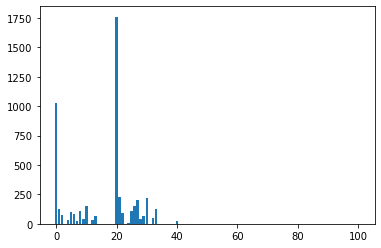

In [116]:
start = time.time()
showFrequency([mas2(i, j) for i in range(100) for j in range(i+1, 100)], lambda x: int(x*100), 0, 100)
end = time.time()
print(end - start)

* Distribution of similarity of movie 100 to 199

2.1786510944366455


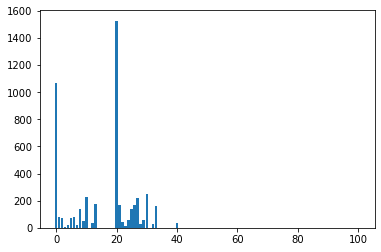

In [117]:
start = time.time()
showFrequency([mas2(i+100, j+100) for i in range(100) for j in range(i+1, 100)], lambda x: int(x*100), 0, 100)
end = time.time()
print(end - start)

* Distribution of movie 200 to 299

2.1396737098693848

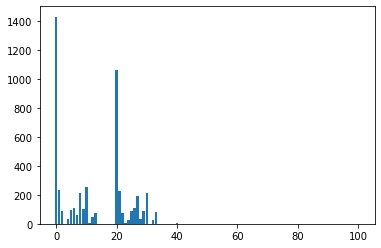

In [118]:
start = time.time()
showFrequency([mas2(i+200, j+200) for i in range(100) for j in range(i+1, 100)], lambda x: int(x*100), 0, 100)
end = time.time()
end-start

* Distribution of movie 0 to 299

17.64867615699768

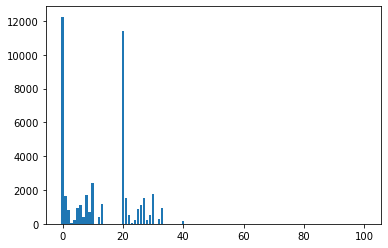

In [119]:
start = time.time()
showFrequency([mas2(i, j) for i in range(300) for j in range(i+1, 300)], lambda x: int(x*100), 0, 100)
end = time.time()
end-start

## Checkpoint 4: Generate MN matrix

* I create function initMN in order to generate MN matrix. First i pass parameter n: first n movies to be computed the similarity.
* We only need to calculate MAS (i, j) where i<j. 
* MAS(i, i) = 1
* MAS(i, j) = MAS(j, i) where i>j

In [120]:
def initMN(n):
    MN_matrix = np.eye(n)
    for i in range(n):
        
        # for every j <= i, MAS(i, j) is computed
        for j in range(0, i):
            MN_matrix[i, j] = MN_matrix[j, i]
        # compute MAS(i, j) if i < j
        for j in range(i+1, n):
            MN_matrix[i, j] = mas2(i, j);
    return MN_matrix

In [121]:
# run this line to generate MN_matrix 100x100
start = time.time()
MN_matrix = initMN(100)
end = time.time()
print(end-start)
np.save('Dataset/ml-25m/process/100/MN_matrix.npy', MN_matrix)

2.500450611114502


In [122]:
# run this line to generate MN_matrix 1000x1000
start = time.time()
MN_matrix = initMN(1000)
end = time.time()
print(end-start)
np.save('Dataset/ml-25m/process/1k/MN_matrix.npy', MN_matrix)

203.5313904285431


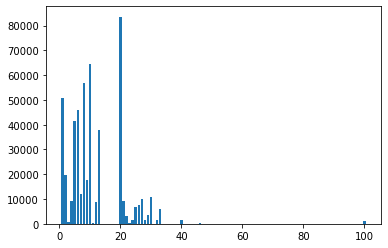

In [123]:
# Distribution of first 1000 movies
showFrequency(MN_matrix.flat, lambda x: int(x*100), 1, 100)

**Due to memory limited, 10000x10000 matrix cannot be initiated.**